In [12]:
using Roots
using Plots

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział, (*bisekcja, fzero*)

In [67]:
function root_section(f, min=-10, max=10, verbose=true)
    fzero(f, x0=0.5, min, max, verbose=verbose)
end

root_section (generic function with 5 methods)

* wykorzystującą pochodną, (*newton*)

In [145]:
function root_derivative(f, start_point=10, verbose=true)
    newton(f, start_point, verbose=verbose)
end

root_derivative (generic function with 3 methods)

* wykorzystującą punkt startowy i przybliżenie pochodnej (*fzero, 2 rzędu*)

In [93]:
function root_start_point(f, start_point=10, verbose=true)
    fzero(f, start_point, order=2, verbose=verbose) 
end

root_start_point (generic function with 3 methods)

1.Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html 


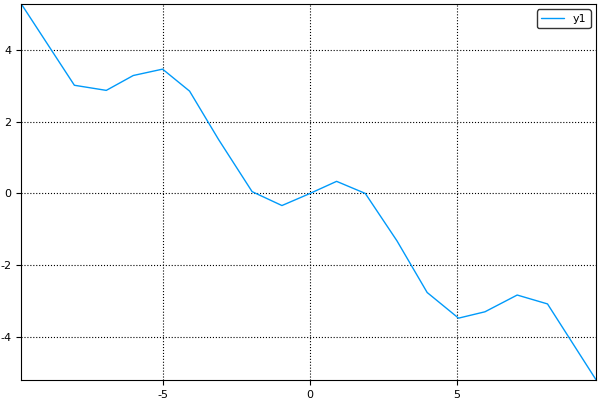

In [14]:
function f_1(x)
    sin(x) - x/2
end

plot(f_1, -10, 10)


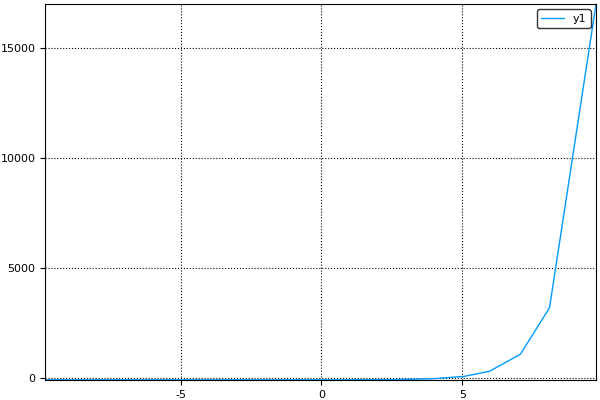

In [61]:
function f_2(x)
    e^x - 100
end

plot(f_2, -10, 10)


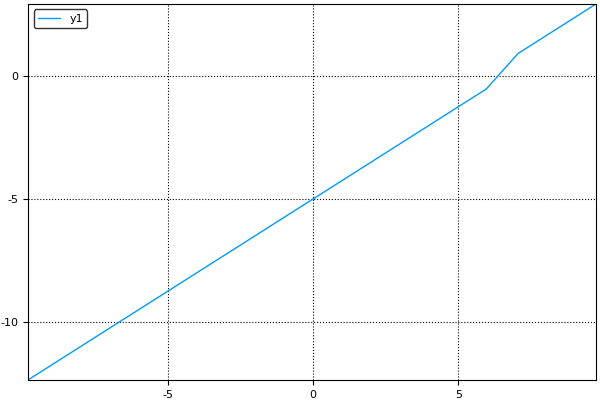

In [62]:
# newton baffler
function f_3(x)
    fx = 0.0
    if x < 6.0
        fx = 0.75 * ( x - 6.25 ) - 0.3125
    elseif x <= 6.50 
        fx = 2.00 * ( x - 6.25 )
    else
        fx = 0.75 * ( x - 6.25 ) + 0.3125
    end
    fx
end
plot(f_3, -10, 10)


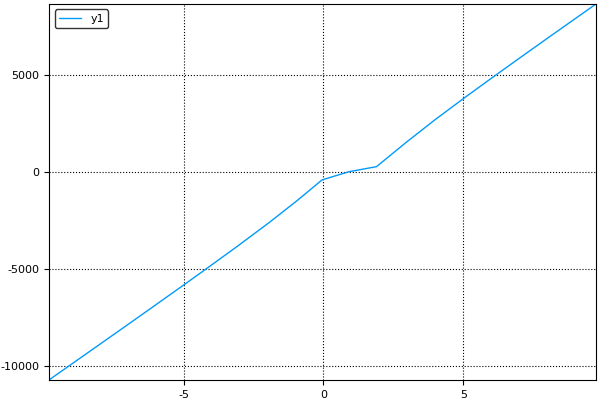

In [63]:
#flat stanley
factor = 1000
function f_4(x)
    fx = 0
    if x < 1
        fx = - e^(log(factor) + log(abs(x - 1)) - (1 / (x - 1)^2))
    elseif x > 1
        fx = e^(log(factor) + log(abs(x - 1)) - (1 / (x - 1)^2))
    end
    fx
end
plot(f_4, -10, 10)     


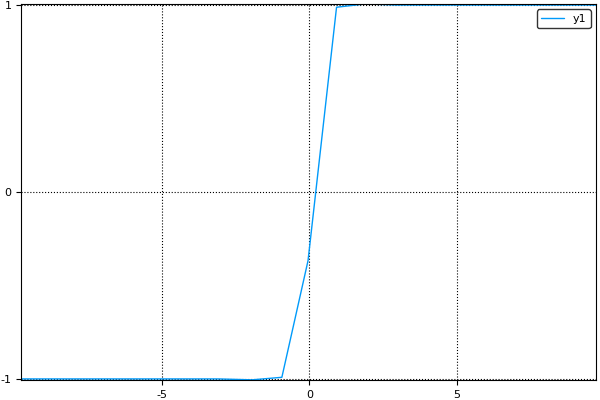

In [111]:
# pathological function for Newton's method.
function f_5(x)
    fx = 0
    if x < 0
        - abs(x)^((1 / 3) * e^(-x^2))
    elseif x > 0
        abs(x)^((1 / 3) * e^(-x^2))
    end
end

plot(f_5, -10, 10)     


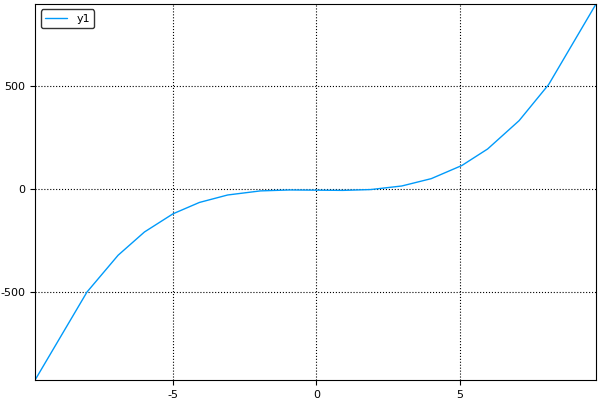

In [128]:
# wallis function`
function f_6(x)
    x^3 - 2*x -5
end

plot(f_6, -10, 10)

In [66]:
root_finders = [root_section, root_derivative, root_start_point]
functions = [f_1, f_2, f_3, f_4, f_5, f_6]


(6,)

In [153]:
f_1(
# root_section(f_1)
root_derivative(f_1, 10)
# root_start_point(f_1, 10)
    )

Results of univariate zero finding:

* Converged to: -1.895494267033981
* Algorithm Roots.Newton()
* iterations: 8
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = abstol, ϵ = reltol

Trace:
x_0 =  10.0000000000000000,	 f(x_0) = -5.5440211108893696
x_1 =  5.8598021162371818,	 f(x_1) = -3.3407483259106083
x_2 =  13.9742406876704468,	 f(x_2) = -6.0003634920419380
x_3 = -3.7891611361671114,	 f(x_3) =  2.4978294950869535
x_4 = -1.8641302801206332,	 f(x_4) = -0.0252200602939280
x_5 = -1.8960889803071546,	 f(x_5) =  0.0004872511563874
x_6 = -1.8954944715018907,	 f(x_6) =  0.0000001674638433
x_7 = -1.8954942670340051,	 f(x_7) =  0.0000000000000198
x_8 = -1.8954942670339809,	 f(x_8) =  0.0000000000000000



0.0

In [147]:
f_2(
# root_section(f_2)
root_derivative(f_2)
# root_start_point(f_2, 10)
    )

Results of univariate zero finding:

* Converged to: 4.605170185988092
* Algorithm Roots.Newton()
* iterations: 11
* function evaluations: 12
* stopped as x_n ≈ x_{n-1} using atol=xabstol, rtol=xreltol

Trace:
x_0 =  10.0000000000000000,	 f(x_0) =  21926.4657948067178950
x_1 =  9.0045399929762482,	 f(x_1) =  8039.9555067160508770
x_2 =  8.0168250724115708,	 f(x_2) =  2931.5371267040427483
x_3 =  7.0498116385727192,	 f(x_3) =  1052.6416091155897448
x_4 =  6.1365688744812239,	 f(x_4) =  362.4640732525014073
x_5 =  5.3528018875598438,	 f(x_5) =  111.1992261071160044
x_6 =  4.8262884710252685,	 f(x_6) =  24.7470978988634442
x_7 =  4.6279103258364582,	 f(x_7) =  2.3000667895309590
x_8 =  4.6054267941857603,	 f(x_8) =  0.0256641124368855
x_9 =  4.6051702189091586,	 f(x_9) =  0.0000032921067827
x_10 =  4.6051701859880918,	 f(x_10) =  0.0000000000000426
x_11 =  4.6051701859880918,	 f(x_11) =  0.0000000000000426



4.605170185988092

In [148]:
f_3(
    # root_section(f_3)
root_derivative(f_3)
# root_start_point(f_3)
    )

Results of univariate zero finding:

* Convergence failed: too many steps taken.
* Algorithm Roots.Newton()

Trace:
x_0 =  10.0000000000000000,	 f(x_0) =  3.1250000000000000
x_1 =  5.8333333333333330,	 f(x_1) = -0.6250000000000002
x_2 =  6.6666666666666670,	 f(x_2) =  0.6250000000000002
x_3 =  5.8333333333333330,	 f(x_3) = -0.6250000000000002
x_4 =  6.6666666666666670,	 f(x_4) =  0.6250000000000002
x_5 =  5.8333333333333330,	 f(x_5) = -0.6250000000000002
x_6 =  6.6666666666666670,	 f(x_6) =  0.6250000000000002
x_7 =  5.8333333333333330,	 f(x_7) = -0.6250000000000002
x_8 =  6.6666666666666670,	 f(x_8) =  0.6250000000000002
x_9 =  5.8333333333333330,	 f(x_9) = -0.6250000000000002
x_10 =  6.6666666666666670,	 f(x_10) =  0.6250000000000002
x_11 =  5.8333333333333330,	 f(x_11) = -0.6250000000000002
x_12 =  6.6666666666666670,	 f(x_12) =  0.6250000000000002
x_13 =  5.8333333333333330,	 f(x_13) = -0.6250000000000002
x_14 =  6.6666666666666670,	 f(x_14) =  0.6250000000000002
x_15 =  5.83333333

LoadError: [91mRoots.ConvergenceFailed("Stopped at: xn = 5.833333333333333")[39m

In [154]:
f_4(
    # root_section(f_4)
root_derivative(f_4)
# root_start_point(f_4)
    )

LoadError: [91msyntax: incomplete: premature end of input[39m

In [150]:
f_5(
    # root_section(f_5)
root_derivative(f_5)
# root_start_point(f_5)
    )

Results of univariate zero finding:

* Converged to: 1.7549625147810152e42
* Algorithm Roots.Newton()
* iterations: 1
* function evaluations: 2
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = abstol, ϵ = reltol

Trace:
x_0 =  10.0000000000000000,	 f(x_0) =  1.0000000000000000
x_1 =  1754962514781015211904138474131571970408448.0000000000000000,	 f(x_1) =  1.0000000000000000



1.7549625147810152e42

In [151]:
f_6(
    # root_section(f_6)
root_derivative(f_6)
# root_start_point(f_6)
    )

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm Roots.Newton()
* iterations: 9
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = abstol, ϵ = reltol

Trace:
x_0 =  10.0000000000000000,	 f(x_0) =  975.0000000000000000
x_1 =  6.7281879194630871,	 f(x_1) =  286.1186843040808299
x_2 =  4.5898707130328411,	 f(x_2) =  82.5146663118409549
x_3 =  3.2416081429494481,	 f(x_3) =  22.5796777796611465
x_4 =  2.4768193541465413,	 f(x_4) =  5.2407417935784064
x_5 =  2.1573379475152148,	 f(x_5) =  0.7258057905576685
x_6 =  2.0966636196021295,	 f(x_6) =  0.0236025390284196
x_7 =  2.0945539887857323,	 f(x_7) =  0.0000279844806377
x_8 =  2.0945514815458659,	 f(x_8) =  0.0000000000395035
x_9 =  2.0945514815423265,	 f(x_9) = -0.0000000000000009



2.0945514815423265

Wyniki przedstawić w formie tabelki. **Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka**`

In [155]:
using DataFrames

results = readtable("results.csv")
# 0 means failure

,_function,root_section_it,root_section_ev,root_derivative_it,root_derivative_ev,root_start_point_it,root_start_point_ev
1,f_1,63,65,8,9,8,17
2,f_2,63,65,11,12,12,25
3,f_3,63,65,0,0,0,0
4,f_4,63,65,20,21,20,41
5,f_5,0,0,1,2,0,0
6,f_6,64,66,9,10,9,19


2.Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej.

In [156]:
root_derivative(f_3)

Results of univariate zero finding:

* Convergence failed: too many steps taken.
* Algorithm Roots.Newton()

Trace:
x_0 =  10.0000000000000000,	 f(x_0) =  3.1250000000000000
x_1 =  5.8333333333333330,	 f(x_1) = -0.6250000000000002
x_2 =  6.6666666666666670,	 f(x_2) =  0.6250000000000002
x_3 =  5.8333333333333330,	 f(x_3) = -0.6250000000000002
x_4 =  6.6666666666666670,	 f(x_4) =  0.6250000000000002
x_5 =  5.8333333333333330,	 f(x_5) = -0.6250000000000002
x_6 =  6.6666666666666670,	 f(x_6) =  0.6250000000000002
x_7 =  5.8333333333333330,	 f(x_7) = -0.6250000000000002
x_8 =  6.6666666666666670,	 f(x_8) =  0.6250000000000002
x_9 =  5.8333333333333330,	 f(x_9) = -0.6250000000000002
x_10 =  6.6666666666666670,	 f(x_10) =  0.6250000000000002
x_11 =  5.8333333333333330,	 f(x_11) = -0.6250000000000002
x_12 =  6.6666666666666670,	 f(x_12) =  0.6250000000000002
x_13 =  5.8333333333333330,	 f(x_13) = -0.6250000000000002
x_14 =  6.6666666666666670,	 f(x_14) =  0.6250000000000002
x_15 =  5.83333333

LoadError: [91mRoots.ConvergenceFailed("Stopped at: xn = 5.833333333333333")[39m

3.Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)

In [160]:
# bisection
s(x) = x^2
root_section(s)

LoadError: [91mArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.

[39m

In [158]:
# newton
root_derivative(f_3)

In [161]:
# derivative estimation
root_derivative(f_3)

Results of univariate zero finding:

* Convergence failed: too many steps taken.
* Algorithm Roots.Newton()

Trace:
x_0 =  10.0000000000000000,	 f(x_0) =  3.1250000000000000
x_1 =  5.8333333333333330,	 f(x_1) = -0.6250000000000002
x_2 =  6.6666666666666670,	 f(x_2) =  0.6250000000000002
x_3 =  5.8333333333333330,	 f(x_3) = -0.6250000000000002
x_4 =  6.6666666666666670,	 f(x_4) =  0.6250000000000002
x_5 =  5.8333333333333330,	 f(x_5) = -0.6250000000000002
x_6 =  6.6666666666666670,	 f(x_6) =  0.6250000000000002
x_7 =  5.8333333333333330,	 f(x_7) = -0.6250000000000002
x_8 =  6.6666666666666670,	 f(x_8) =  0.6250000000000002
x_9 =  5.8333333333333330,	 f(x_9) = -0.6250000000000002
x_10 =  6.6666666666666670,	 f(x_10) =  0.6250000000000002
x_11 =  5.8333333333333330,	 f(x_11) = -0.6250000000000002
x_12 =  6.6666666666666670,	 f(x_12) =  0.6250000000000002
x_13 =  5.8333333333333330,	 f(x_13) = -0.6250000000000002
x_14 =  6.6666666666666670,	 f(x_14) =  0.6250000000000002
x_15 =  5.83333333

LoadError: [91mRoots.ConvergenceFailed("Stopped at: xn = 5.833333333333333")[39m